# Salary Prediction using AMCAT dataset

## 1.0 Importing packages

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy.sparse import hstack
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## 1.1 Importing data

In [2]:
train = pd.read_excel('Data/train.xlsx')
test = pd.read_excel('Data/test.xlsx')

In [3]:
train.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
test.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,test,664736,?,?,?,?,?,m,1992-01-16,75.0,...,-1,-1,-1,-1,-1,0.2718,-0.2871,0.4711,-0.7415,-0.4776
1,test,1123290,?,?,?,?,?,m,1992-06-05,83.0,...,253,-1,-1,-1,-1,0.7027,0.2124,1.2396,-0.8682,1.0554
2,test,1062444,?,?,?,?,?,f,1992-11-22,85.2,...,-1,-1,-1,-1,-1,0.1282,1.0449,-0.6048,-1.6289,-0.8608
3,test,1072028,?,?,?,?,?,f,1990-10-17,81.8,...,469,-1,-1,-1,-1,0.4155,1.0449,-0.6048,1.5404,1.0554
4,test,267259,?,?,?,?,?,m,1990-03-20,78.0,...,-1,-1,-1,-1,-1,0.0464,0.0328,-0.0537,0.0623,0.6603


## 1.2 Understanding high level details about data

### 1.2.1 Missing values

In [5]:
train.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [6]:
test.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

<blockquote style="font-size:17px;color:crimson;">There are no missing values in the training data and testing data.</blockquote>

### 1.2.2 Other information

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [8]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1500.0,665286.300667,360532.421901,7474.0000,335062.500000,641930.500000,985802.500000,1.298259e+06
10percentage,1500.0,78.384553,9.565983,43.0800,72.000000,80.000000,85.600000,9.760000e+01
12graduation,1500.0,2008.122000,1.588542,2000.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,1500.0,74.947040,10.632432,40.8300,67.000000,75.000000,83.200000,9.800000e+01
CollegeID,1500.0,5202.454667,4750.131676,2.0000,830.000000,3879.000000,8784.750000,1.729300e+04
CollegeTier,1500.0,1.926667,0.260770,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,1500.0,71.615147,8.747405,7.0000,67.147500,72.000000,76.662500,9.500000e+01
CollegeCityID,1500.0,5202.454667,4750.131676,2.0000,830.000000,3879.000000,8784.750000,1.729300e+04
CollegeCityTier,1500.0,0.278000,0.448163,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,1500.0,2012.621333,1.288559,2008.0000,2012.000000,2013.000000,2014.000000,2.017000e+03


## 1.3 Exploratory Data analysis

### 1.3.1 Visualization

#### 1.3.1.1 '10'nth percentage attribute

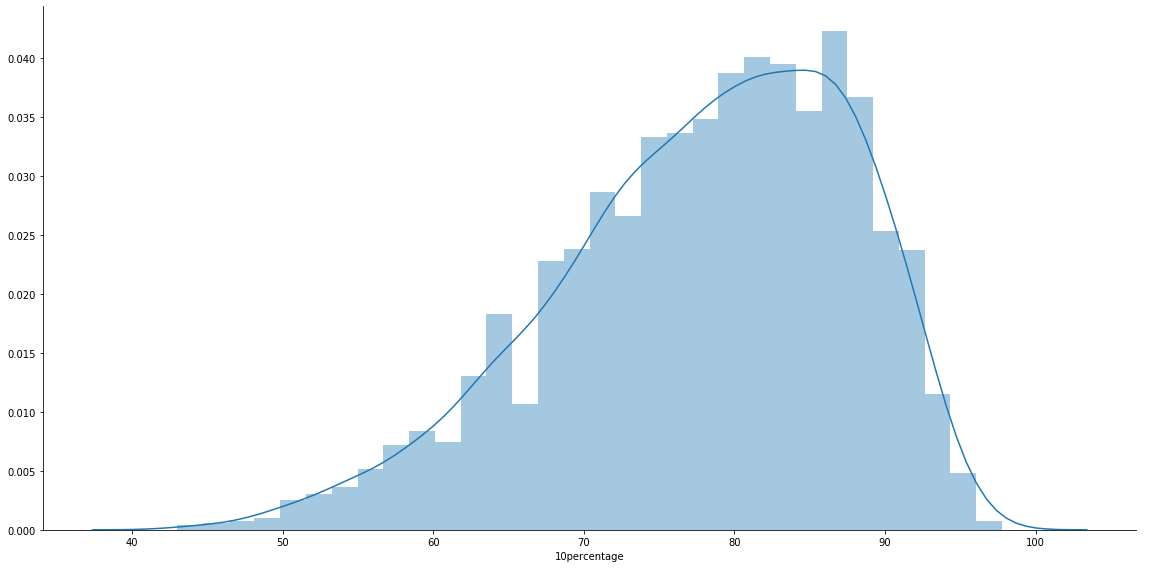

In [9]:
sns.FacetGrid(data=train,height=8,aspect=2).map(sns.distplot,"10percentage").add_legend()

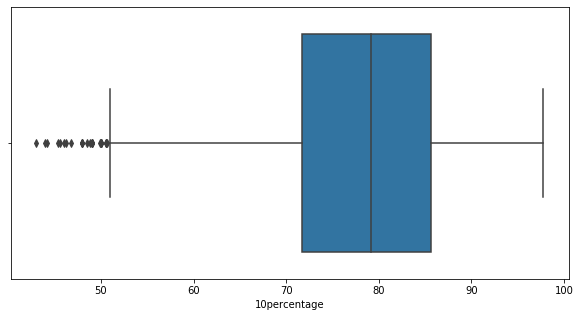

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(train['10percentage'])

#### 1.3.1.2 Gender attribute

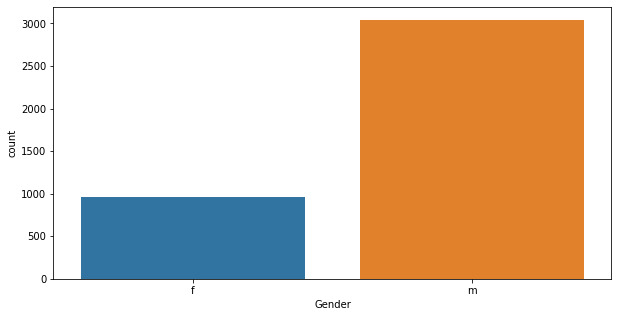

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(train['Gender'])

#### 1.3.1.3 '10'nth Board attribute

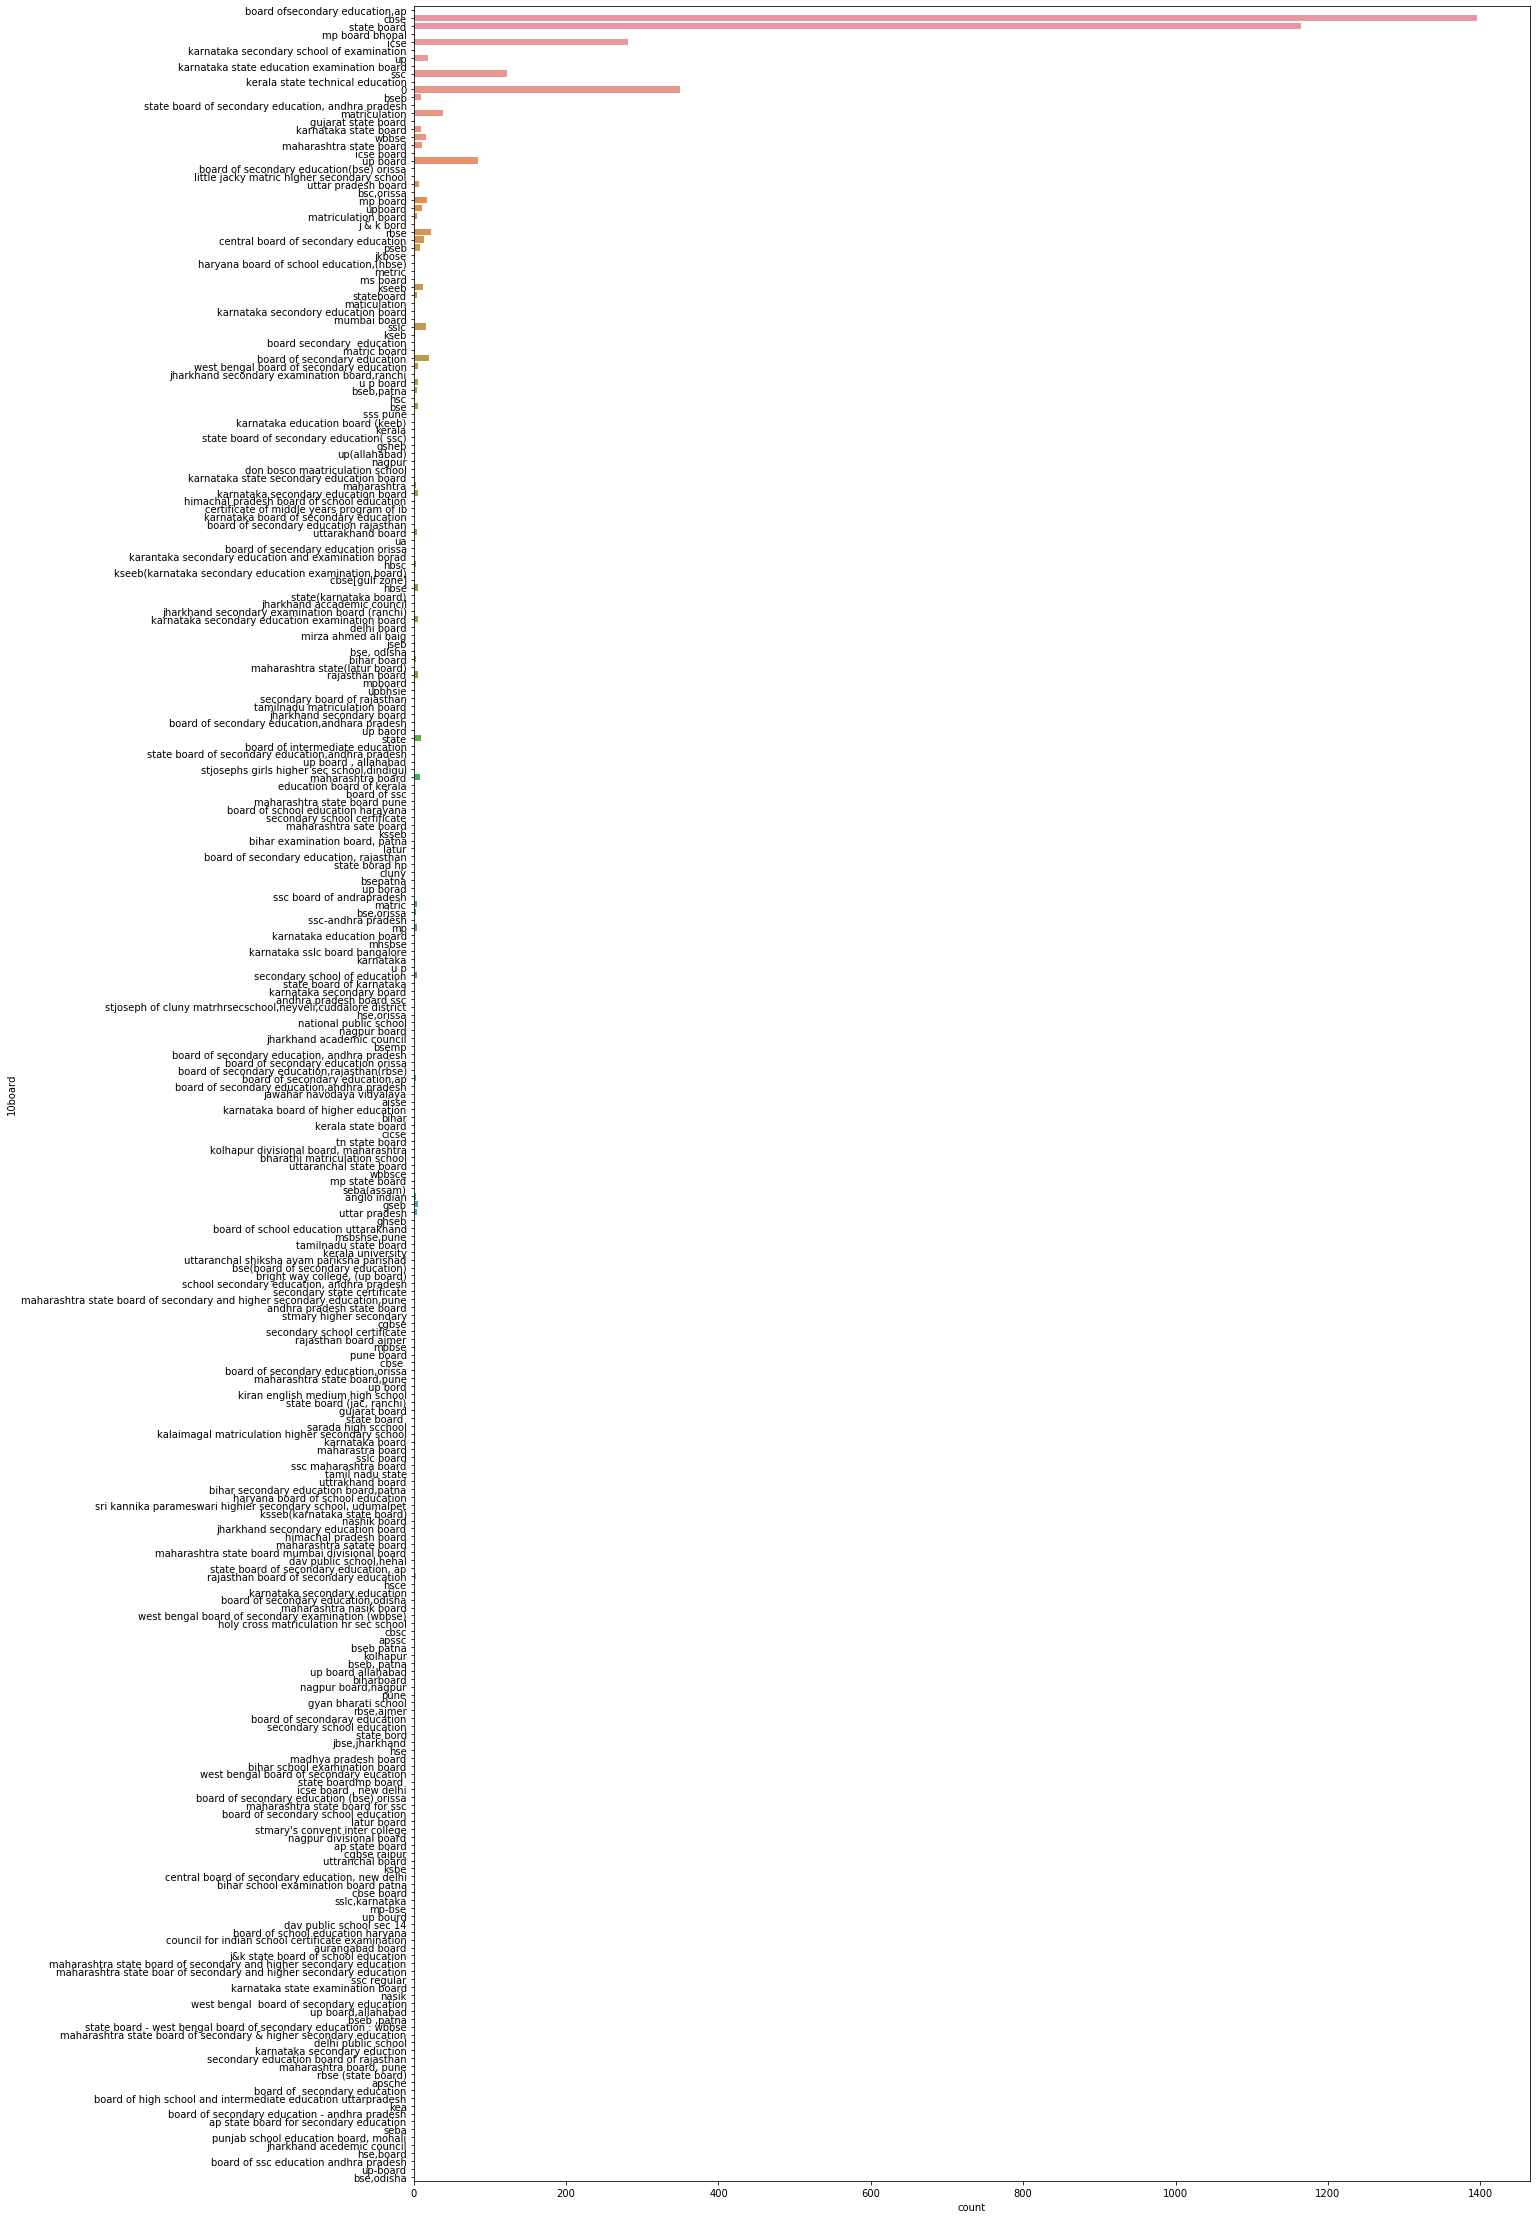

In [12]:
plt.figure(figsize=(20,40))
sns.countplot(y=train['10board'])

In [13]:
train['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

#### 1.3.1.4  Year of 12th graduation attribute

Text(7.197453703703708, 0.5, 'count')

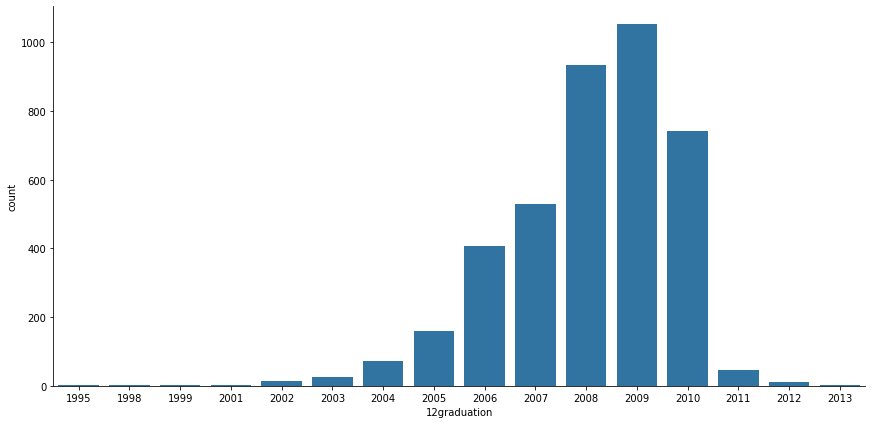

In [14]:
sns.FacetGrid(data=train,height=6,aspect=2).map(sns.countplot,"12graduation").add_legend()
plt.ylabel("count")

#### 1.3.1.5 '12'th board attribute

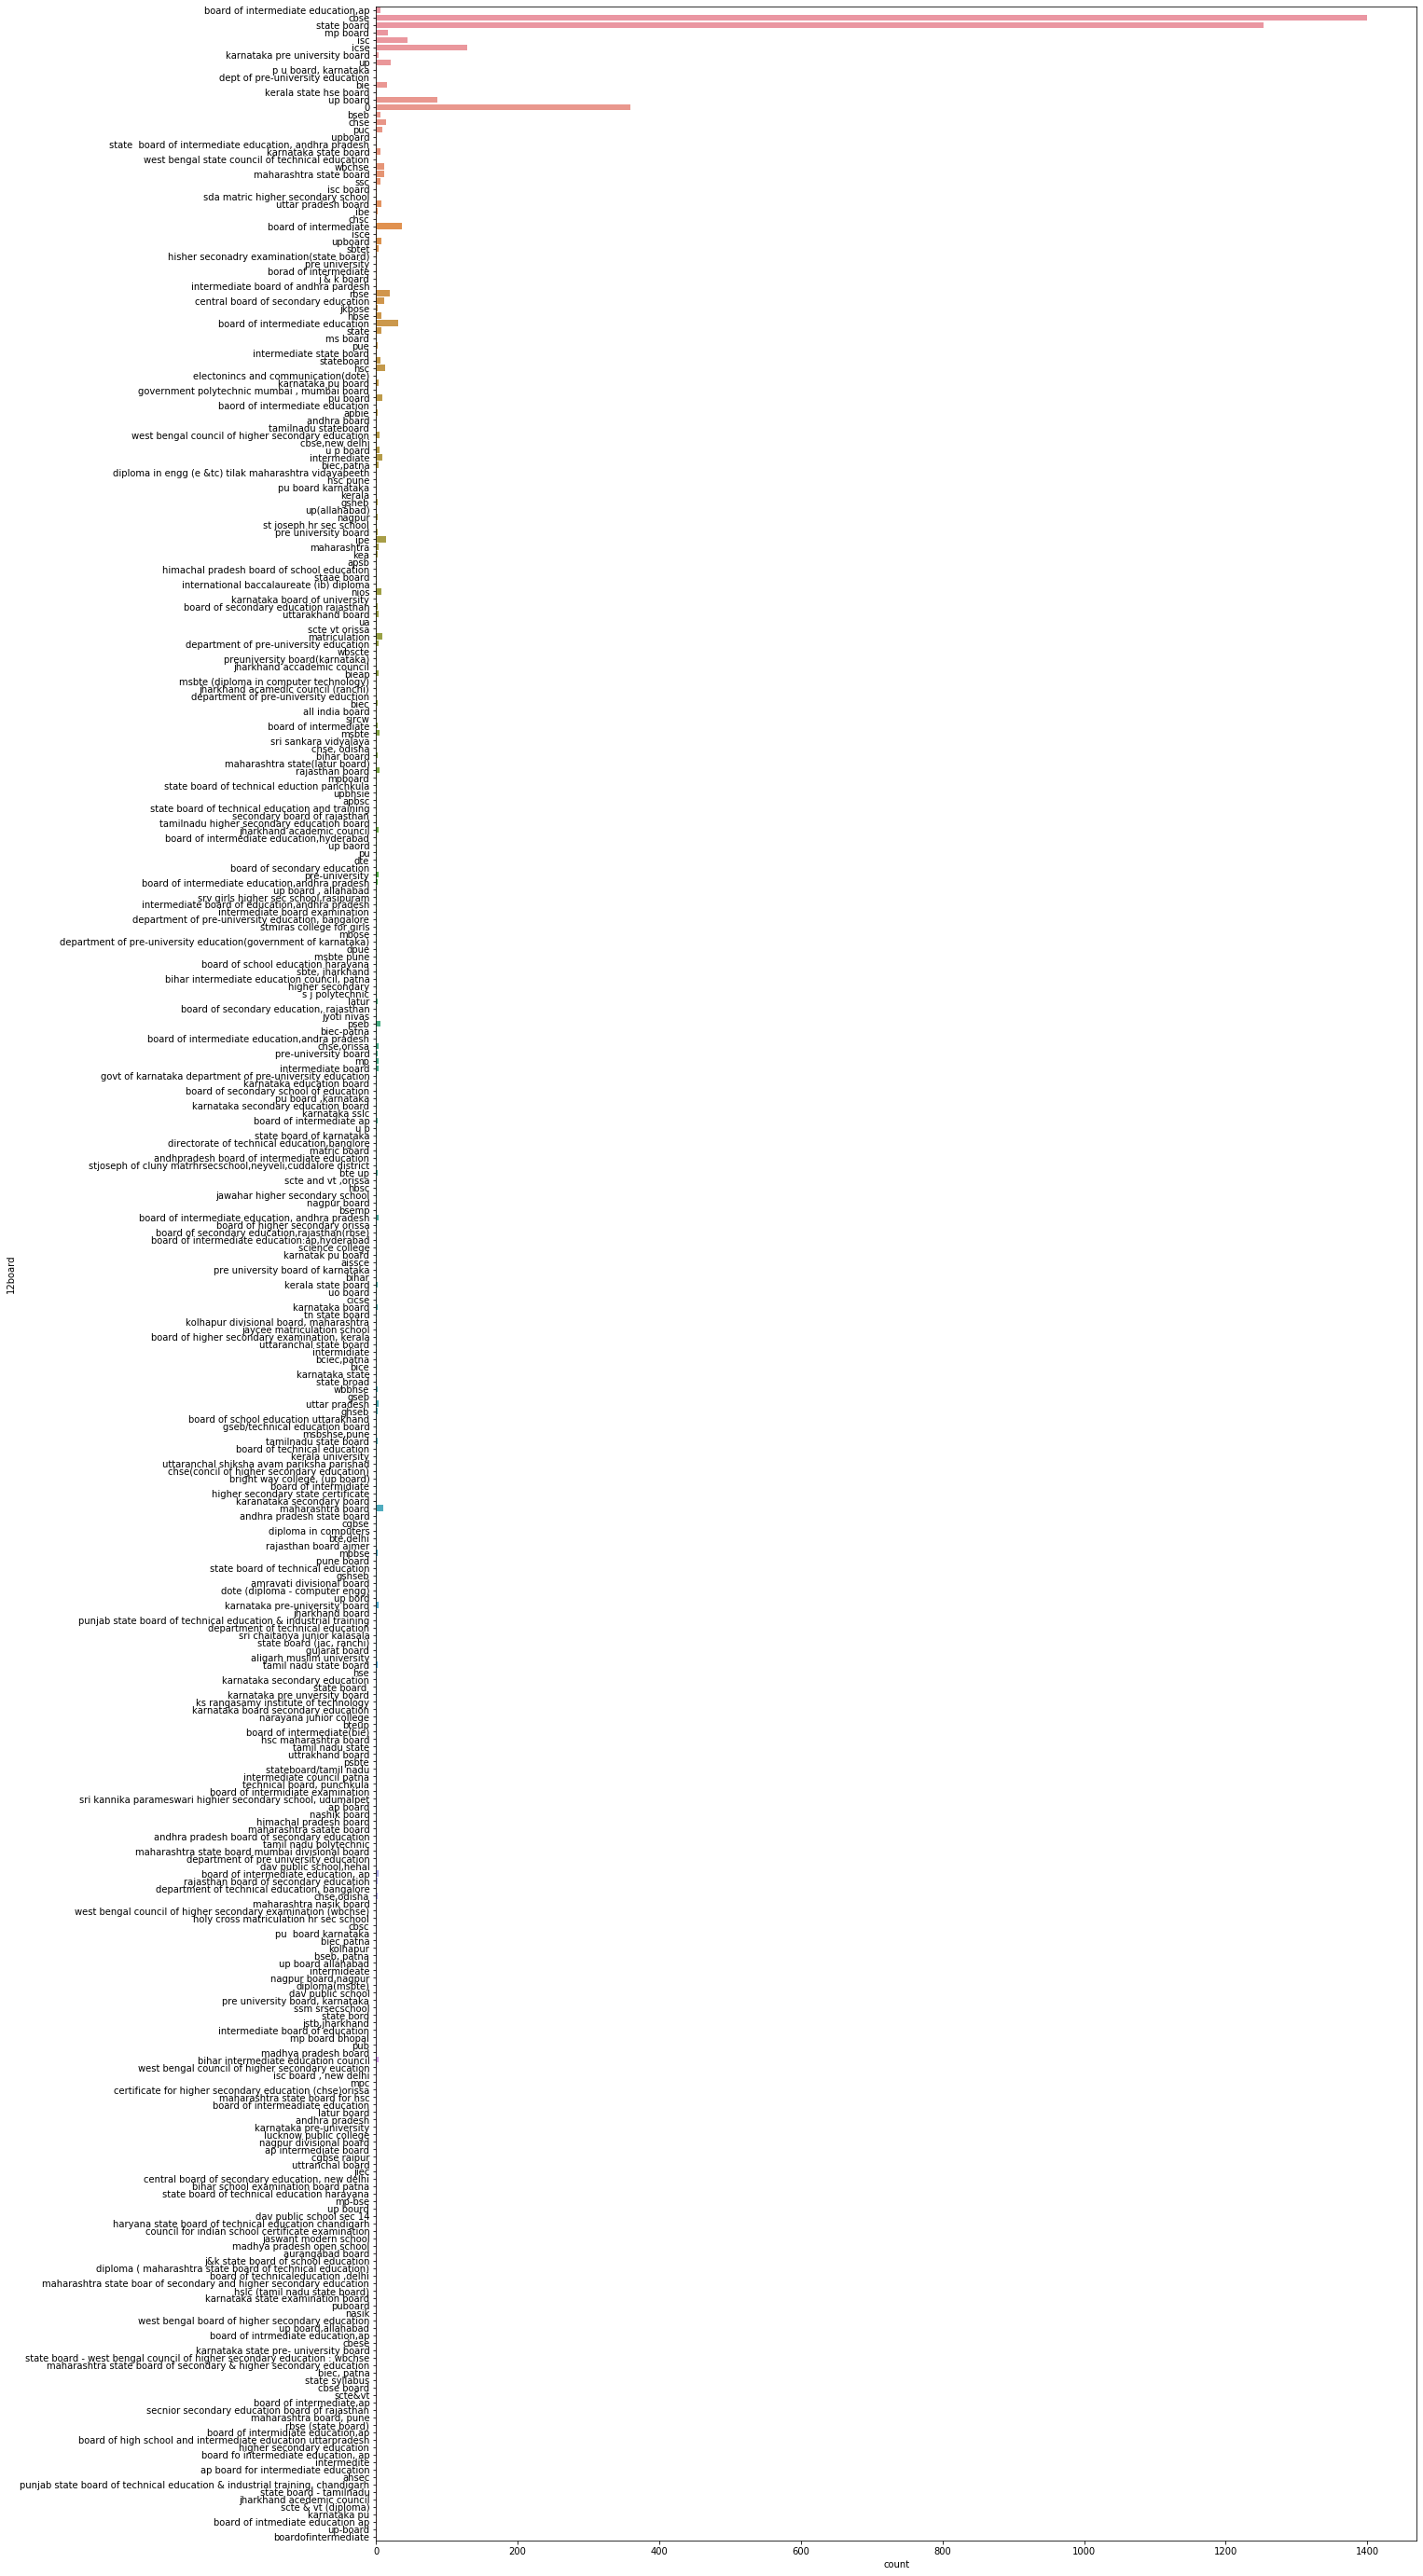

In [15]:
plt.figure(figsize=(20,50))
sns.countplot(y=train['12board'])

In [16]:
print(train['12board'].unique())

['board of intermediate education,ap' 'cbse' 'state board' 'mp board'
 'isc' 'icse' 'karnataka pre university board' 'up' 'p u board, karnataka'
 'dept of pre-university education' 'bie' 'kerala state hse board'
 'up board' 0 'bseb' 'chse' 'puc' ' upboard'
 'state  board of intermediate education, andhra pradesh'
 'karnataka state board'
 'west bengal state council of technical education' 'wbchse'
 'maharashtra state board' 'ssc' 'isc board'
 'sda matric higher secondary school' 'uttar pradesh board' 'ibe' 'chsc'
 'board of intermediate' 'isce' 'upboard' 'sbtet'
 'hisher seconadry examination(state board)' 'pre university'
 'borad of intermediate' 'j & k board'
 'intermediate board of andhra pardesh' 'rbse'
 'central board of secondary education' 'jkbose' 'hbse'
 'board of intermediate education' 'state' 'ms board' 'pue'
 'intermediate state board' 'stateboard' 'hsc'
 'electonincs and communication(dote)' 'karnataka pu board'
 'government polytechnic mumbai , mumbai board' 'pu board'
 

#### 1.3.1.6  College tier

Text(7.5972222222222285, 0.5, 'count')

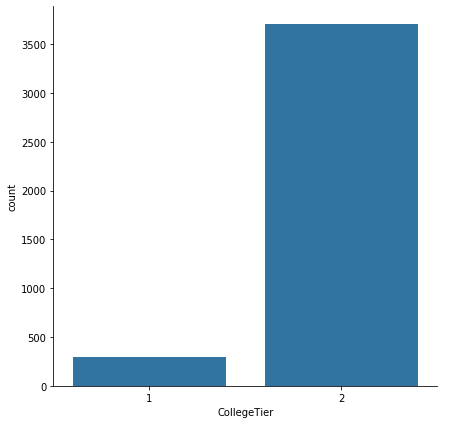

In [17]:
sns.FacetGrid(data=train,height=6).map(sns.countplot,"CollegeTier").add_legend()
plt.ylabel("count")

#### 1.3.1.7 Degree attribute

Text(7.198611111111113, 0.5, 'count')

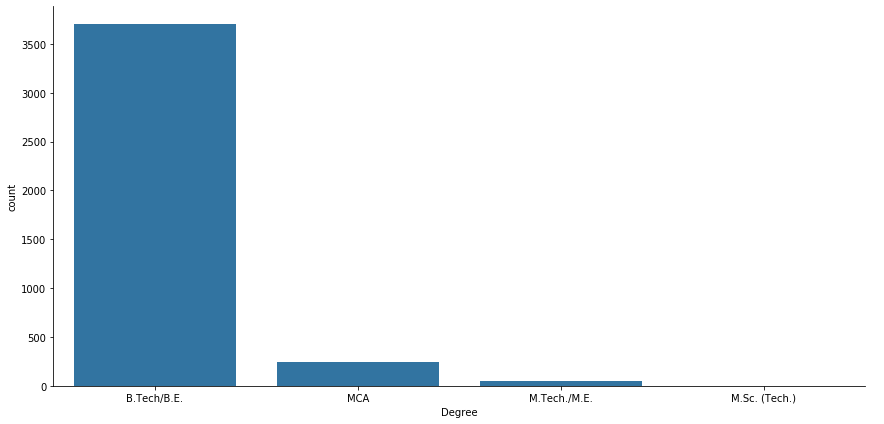

In [18]:
sns.FacetGrid(data=train,height=6,aspect=2).map(sns.countplot,"Degree").add_legend()
plt.ylabel("count")

#### 1.3.1.8 Specalization attribute

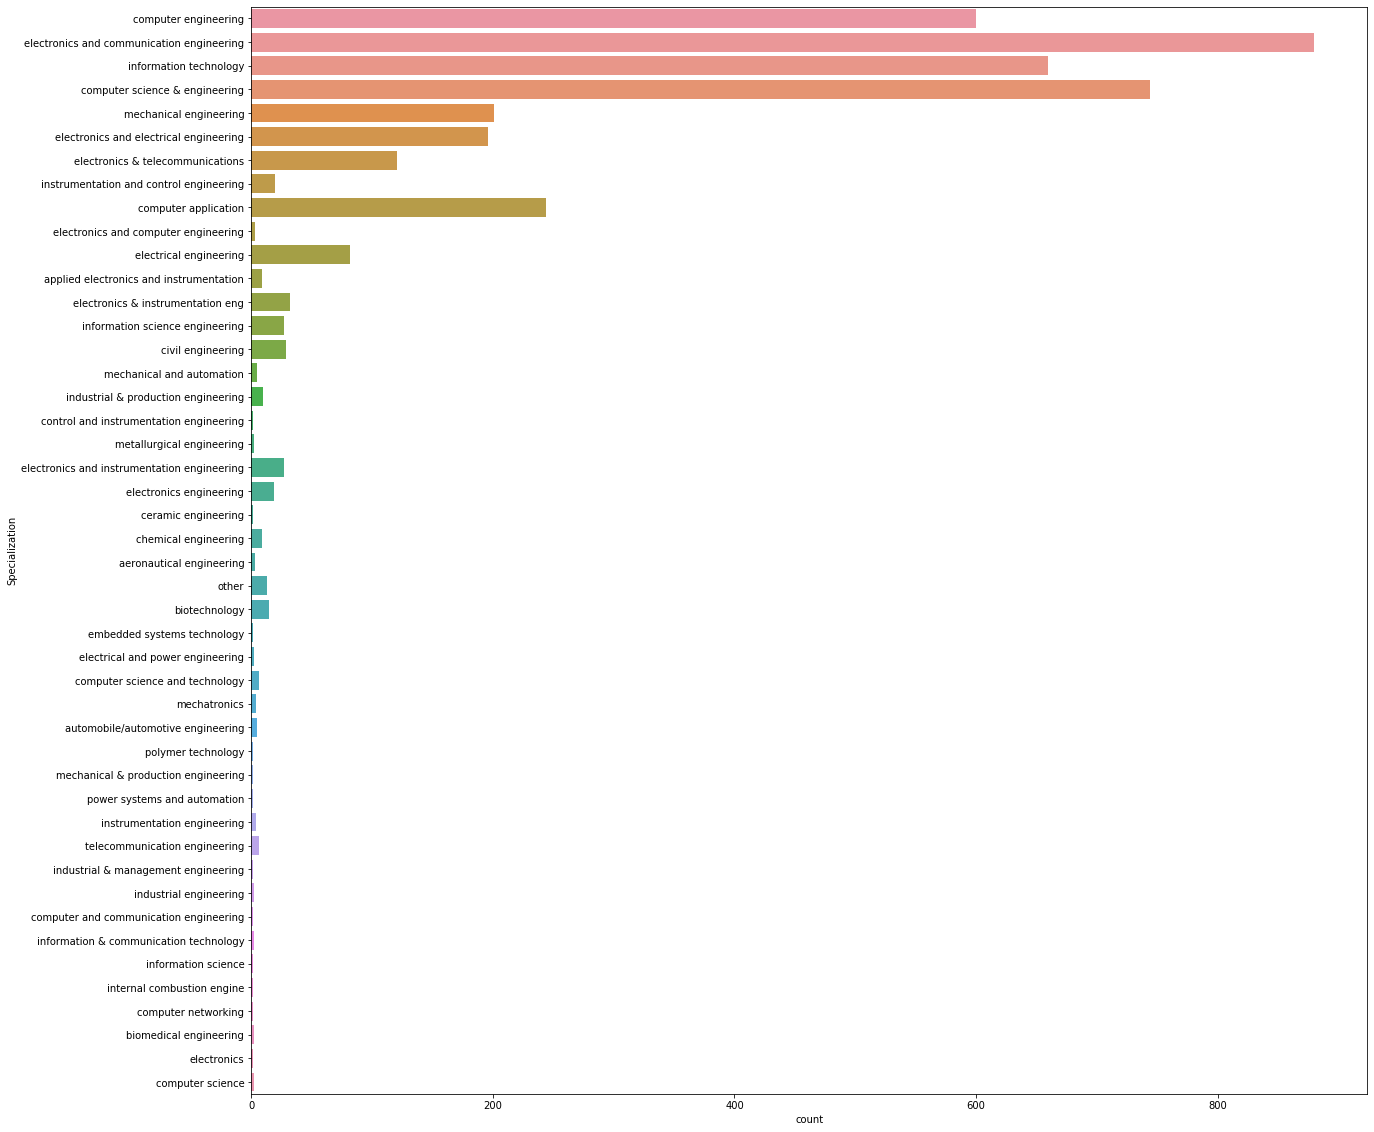

In [19]:
plt.figure(figsize=(20,20))
sns.countplot(y=train['Specialization'])

#### 1.3.1.9 Graduation GPA (in percentage) attribute

Text(0.5, 20.80000000000001, 'College GPA in percentage')

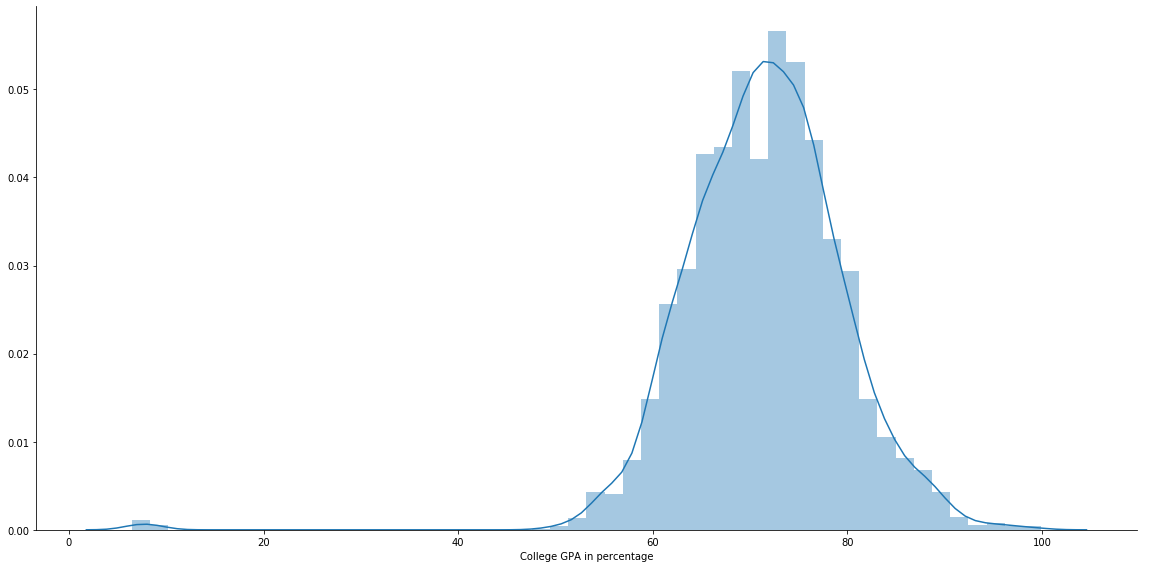

In [20]:
sns.FacetGrid(data=train,height=8,aspect=2).map(sns.distplot,"collegeGPA").add_legend()
plt.xlabel("College GPA in percentage")

#### 1.3.1.10 College City Tier attribute

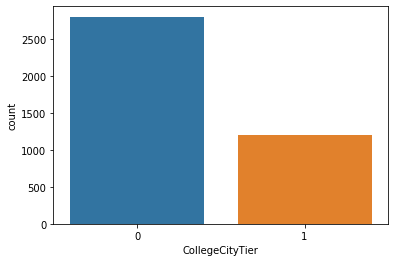

In [21]:
sns.countplot(train['CollegeCityTier'])

#### 1.3.1.11 College state

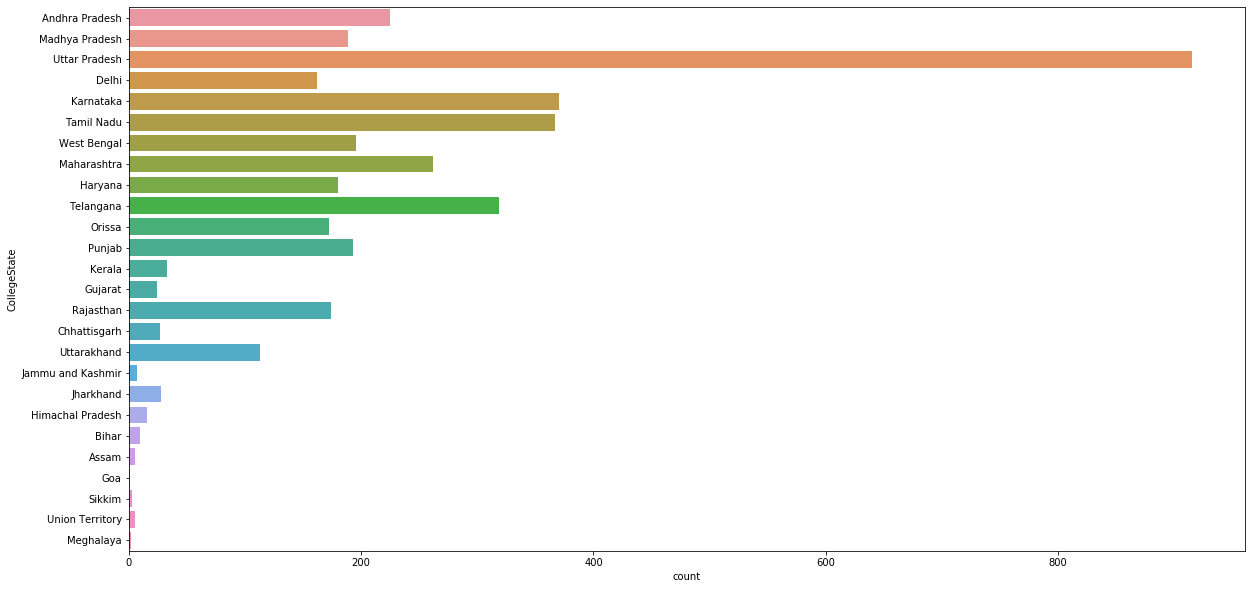

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(y=train['CollegeState'])

#### 1.3.1.12 Year of bachelors degree graduation

Text(7.198611111111113, 0.5, 'count')

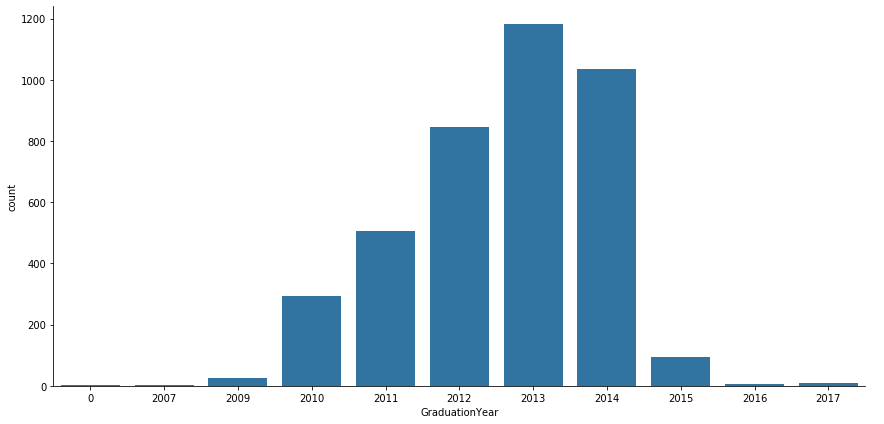

In [23]:
sns.FacetGrid(data=train,height=6,aspect=2).map(sns.countplot,"GraduationYear").add_legend()
plt.ylabel("count")

#### 1.3.1.13 Amcat English section score attribute

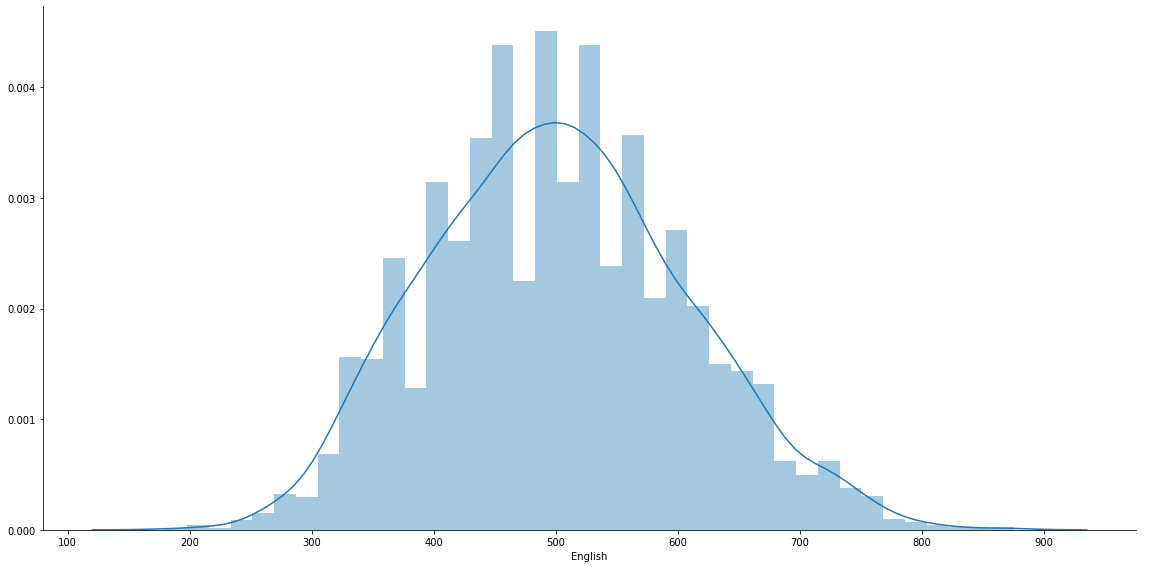

In [24]:
sns.FacetGrid(data=train,height=8,aspect=2).map(sns.distplot,"English").add_legend()

#### 1.3.1.14 Amcat Logical ability section score attribute

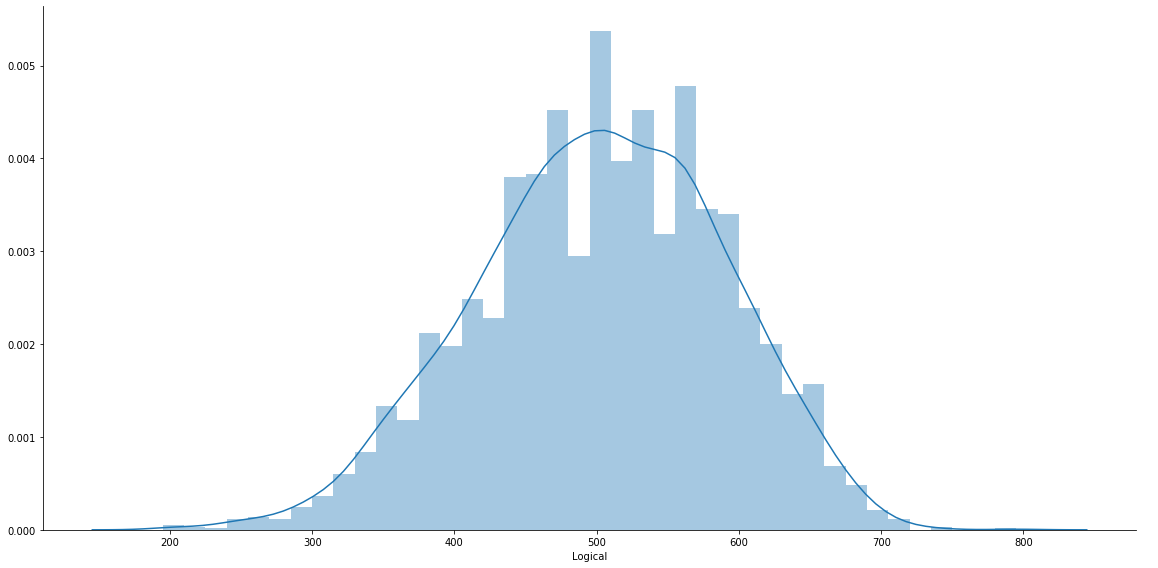

In [25]:
sns.FacetGrid(data=train,height=8,aspect=2).map(sns.distplot,"Logical").add_legend()

#### 1.3.1.15 Amcat Quants section score attribute

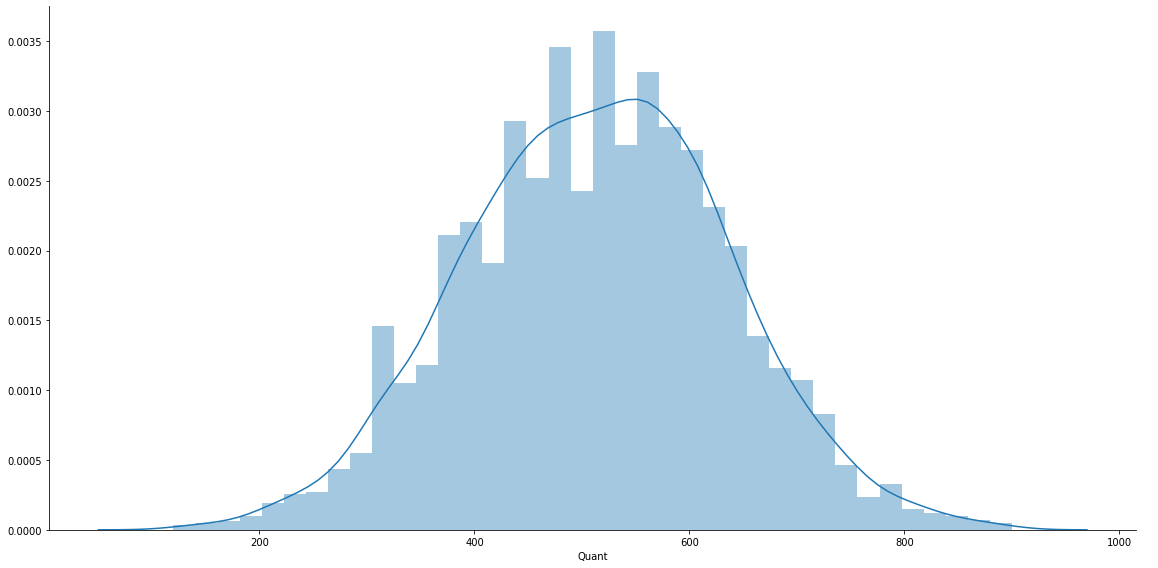

In [26]:
sns.FacetGrid(data=train,height=8,aspect=2).map(sns.distplot,"Quant").add_legend()

#### 1.3.1.16 Amcat  domain score

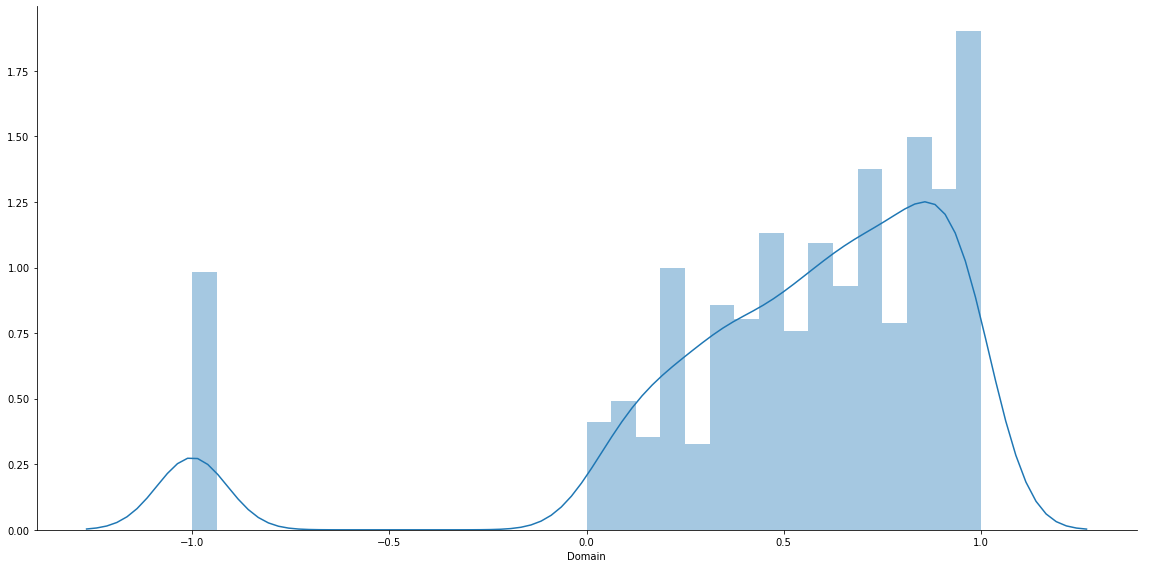

In [27]:
sns.FacetGrid(data=train,height=8,aspect=2).map(sns.distplot,"Domain").add_legend()

#### 1.3.1.17 Personality test conscientiousness score attribute

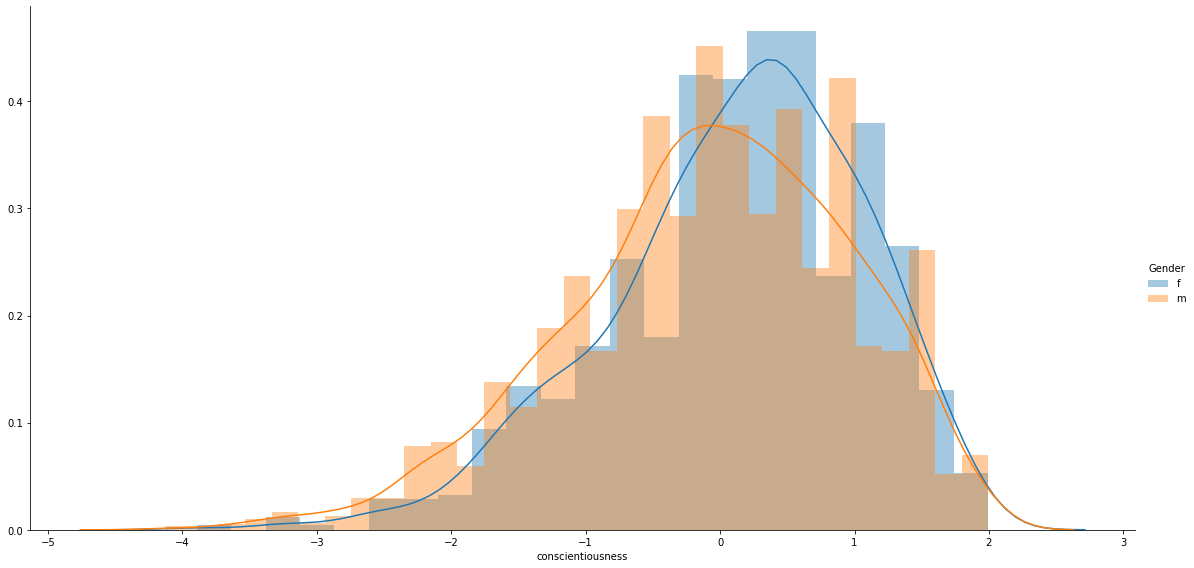

In [28]:
sns.FacetGrid(data=train,hue="Gender",height=8,aspect=2).map(sns.distplot,"conscientiousness").add_legend()

#### 1.3.1.18 Personality test agreeableness score attribute

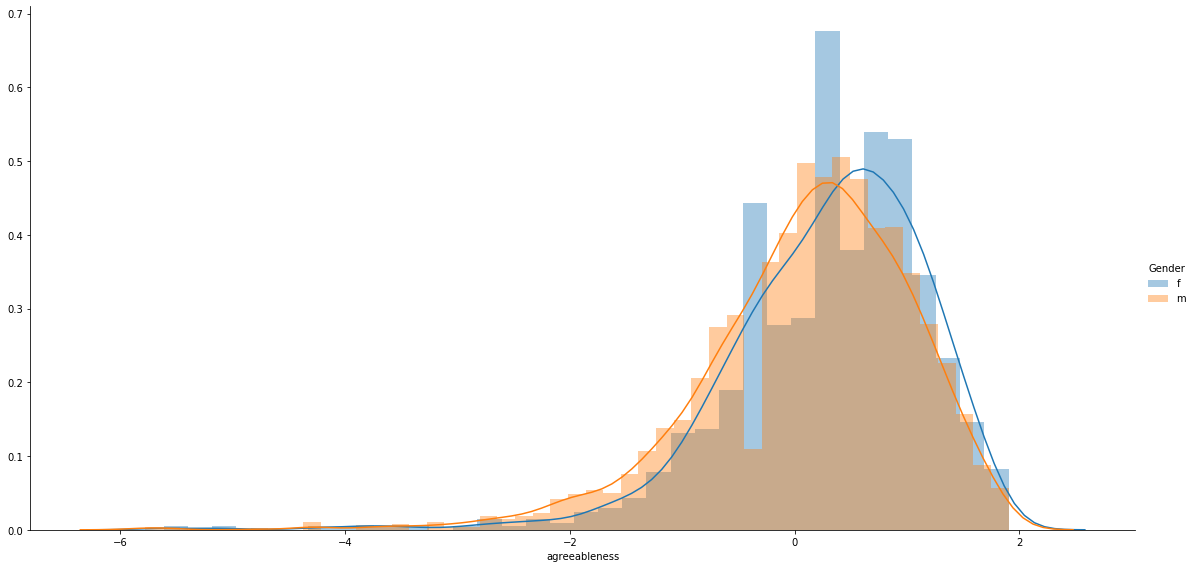

In [29]:
sns.FacetGrid(data=train,hue="Gender",height=8,aspect=2).map(sns.distplot,"agreeableness").add_legend()

#### 1.3.1.19 Personality test extraversion score attribute

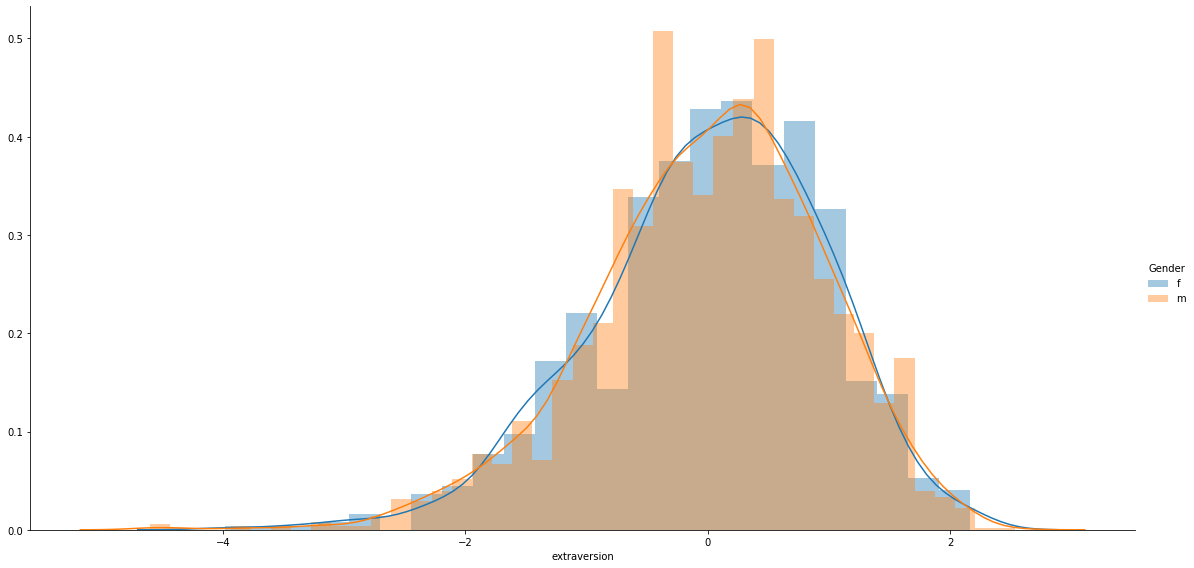

In [30]:
sns.FacetGrid(data=train,hue="Gender",height=8,aspect=2).map(sns.distplot,"extraversion").add_legend()

#### 1.3.1.20 Personality test nueroticism score attribute

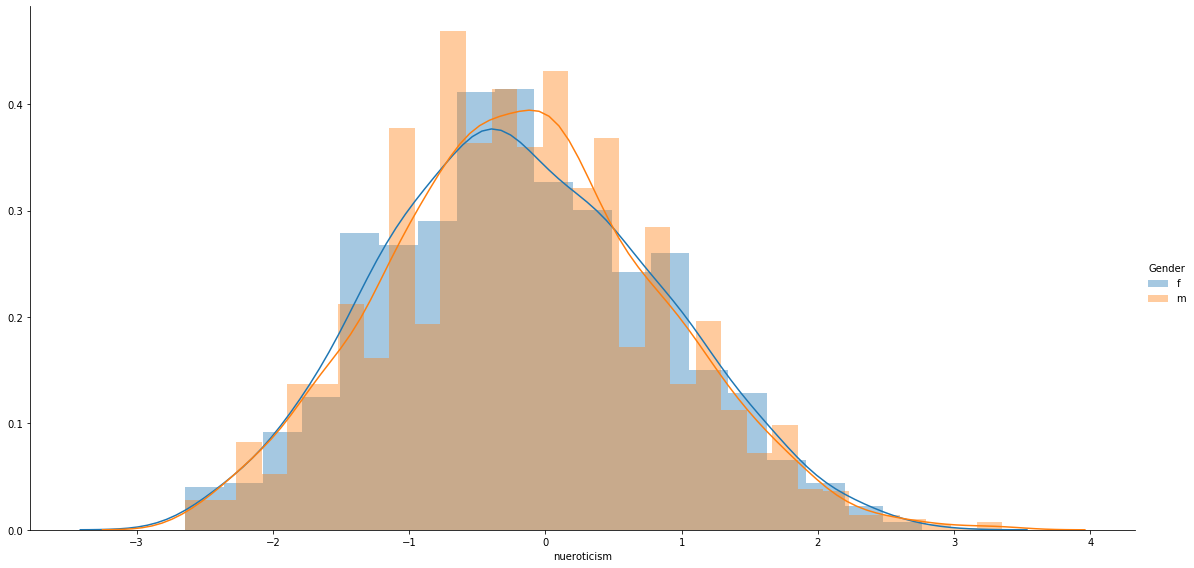

In [31]:
sns.FacetGrid(data=train,hue="Gender",height=8,aspect=2).map(sns.distplot,"nueroticism").add_legend()

#### 1.3.1.21 Personality test openess_to_experience score attribute

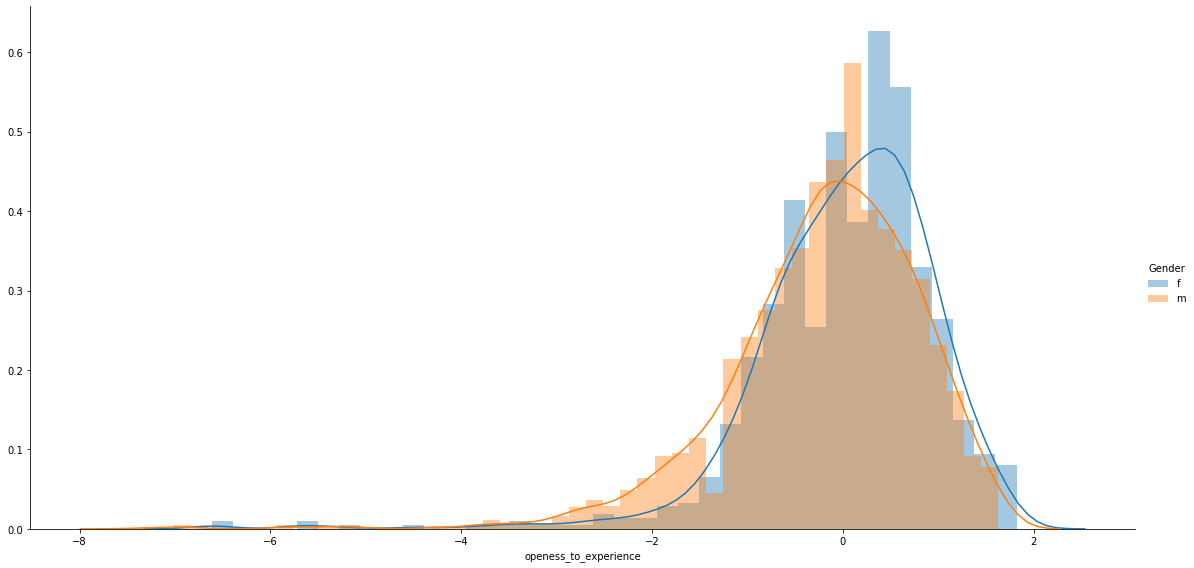

In [32]:
sns.FacetGrid(data=train,hue="Gender",height=8,aspect=2).map(sns.distplot,"openess_to_experience").add_legend()

#### 1.3.1.22 Analyzing the target (Salary) Variable by gender

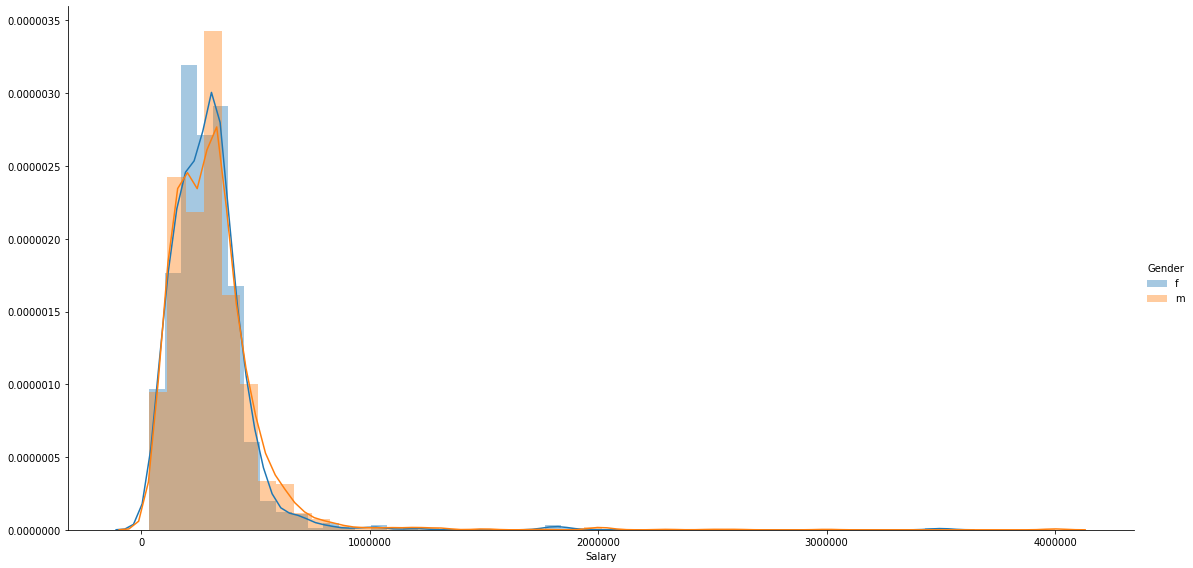

In [33]:
sns.FacetGrid(data=train,hue="Gender",height=8,aspect=2).map(sns.distplot,"Salary").add_legend()

#### 1.3.1.23 Pair plot of amcat scores by College Tier

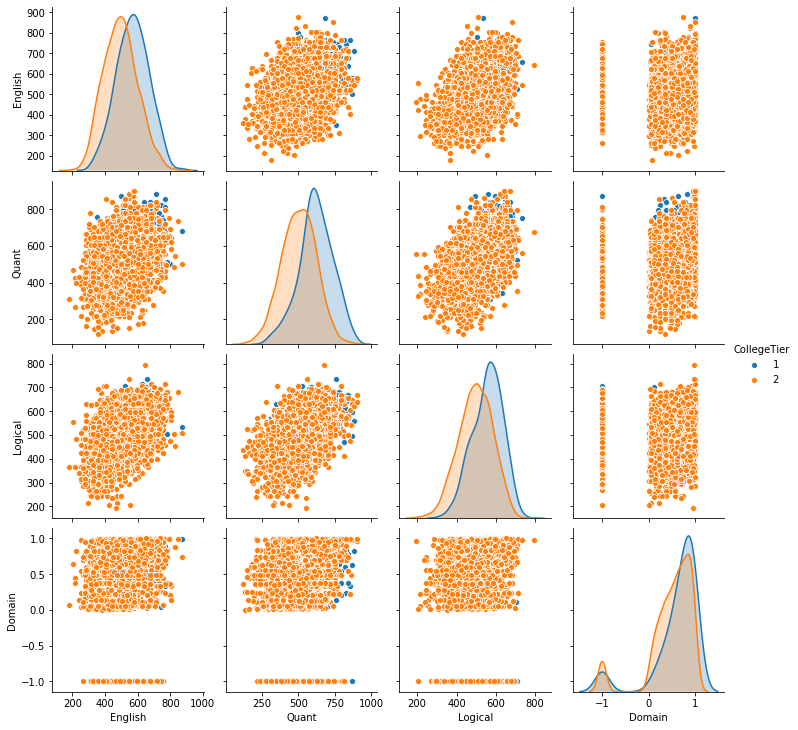

In [34]:
amcatScores = train[['English','Quant','Logical','Domain','CollegeTier']]
sns.pairplot(data=amcatScores,hue="CollegeTier")

#### 1.3.1.24 Pair plot of amcat scores by Degree

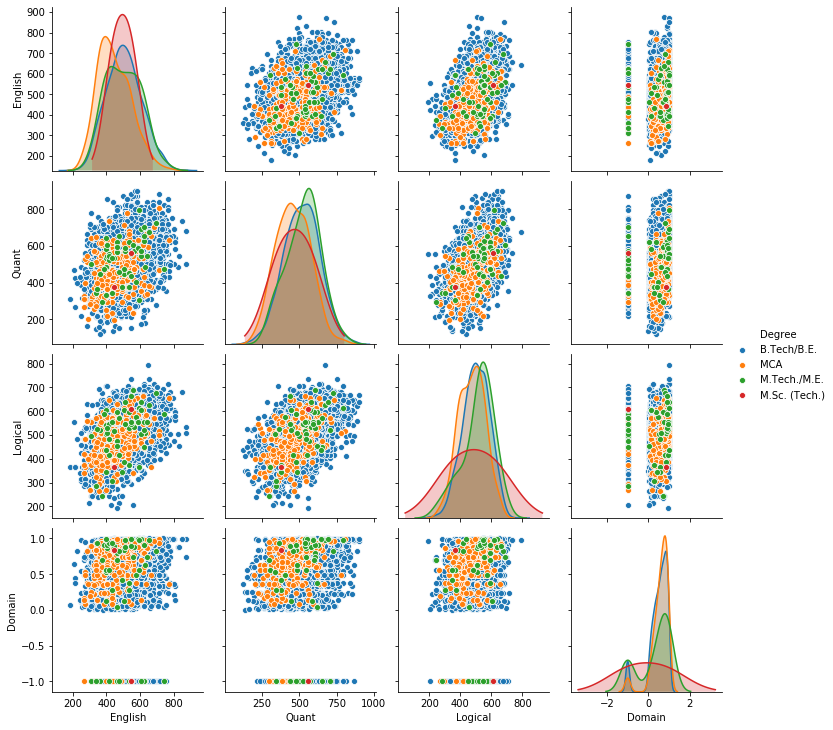

In [35]:
amcatScores1 = train[['English','Quant','Logical','Domain','Degree']]
sns.pairplot(data=amcatScores1,hue="Degree")

#### 1.3.1.25 Pair plot of personality scores by Degree

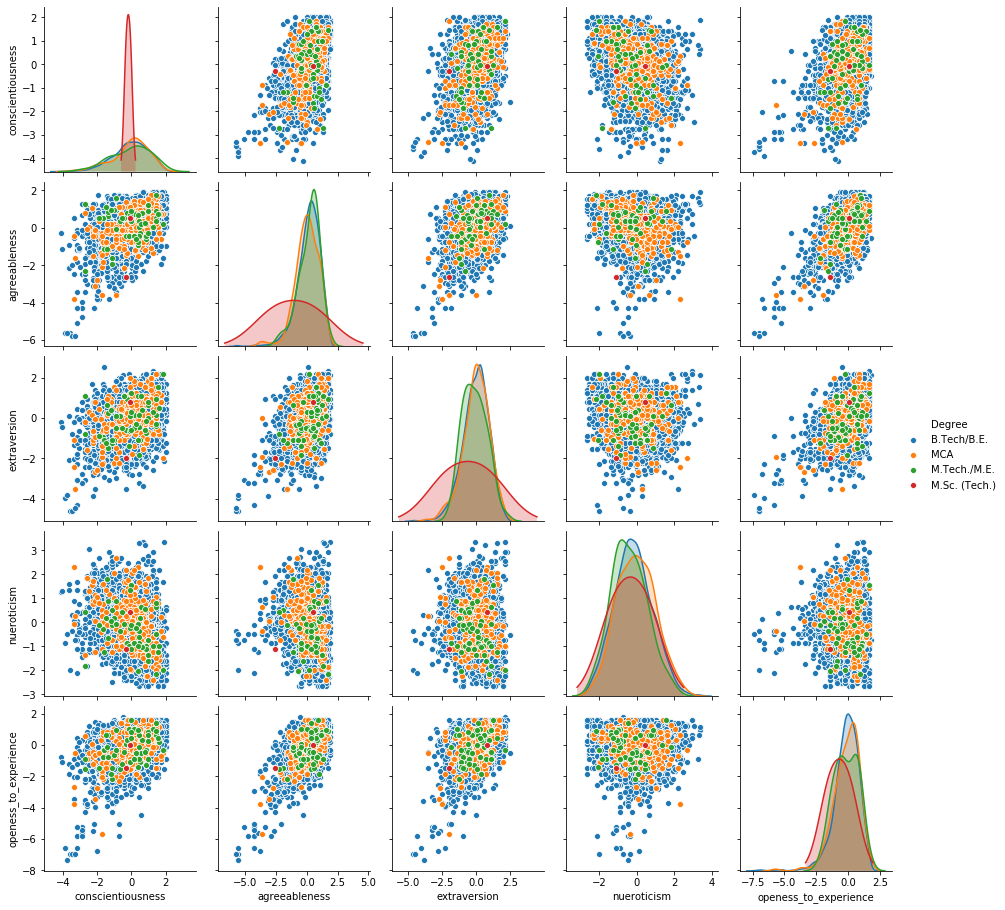

In [36]:
personalityScores = train[['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Degree']]
sns.pairplot(data=personalityScores,hue='Degree')

## 1.4 Making necessary Assumptions and changes accordingly

<blockquote style="font-size:17px;color:indigo;">
    <ul>
        <li>1. As our Objective in this project is to Predict the salary given the details, We don`t need the DOJ(Date of joining),DOL(Data of leaving),JobDesignation and JobCity attributes. As they are dependent variables we can simply drop them and use salary as our only dependent variable.</li>
        <li>2. We don`t need CollegeId and CollegeCityID atributes. And it is perfectly safe to drop them. Because we already have a unique ID for every candidate.</li>
        <li>3. Instead of considering the specific score for each domain, We can simply consider the percentile of the domain score (Which is also a feature given).</li>
        <li>4. We would encode the numerical attributes and categorical attributes and stack them to create our feature vector.</li>
    </ul>
</blockquote>

Dropping the unnecessary features

In [37]:
features = train.drop(['CollegeID','CollegeCityID','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','ElectricalEngg','TelecomEngg','CivilEngg','MechanicalEngg','DOJ','DOL','Designation','JobCity','Unnamed: 0'],axis=1)
candidate_id = features['ID']
features = features.drop(['ID'],axis=1)
features.head()

,Salary,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,...,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,2011,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,...,2012,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,...,2014,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,...,2011,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,...,2012,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Dividing features into dependent variables and independent variables

In [38]:
x = features.drop(['Salary'],axis=1)
y = features['Salary'].values

## 1.5 Dividing the data into Train,Test and Cross validation

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.3,random_state=0)
print("Shape of x_train : ",x_train.shape)
print("Shape of x_cv : ",x_cv.shape)
print("Shape of x_test : ",x_test.shape)

Shape of x_train :  (1958, 23)
Shape of x_cv :  (840, 23)
Shape of x_test :  (1200, 23)


## 1.6 Encoding the features

### 1.6.1 Encoding the Gender atribute

In [40]:
le = preprocessing.LabelEncoder()
le.fit(x_train['Gender'])
x_train_gender = le.transform(x_train['Gender']).reshape(1,-1).T
x_cv_gender = le.transform(x_cv['Gender']).reshape(1,-1).T
x_test_gender = le.transform(x_test['Gender']).reshape(1,-1).T
print(x_train_gender.shape)
print(x_cv_gender.shape)
print(x_test_gender.shape)

(1958, 1)
(840, 1)
(1200, 1)


### 1.6.2 Encoding the date of birth

Replacing the whole date of birth by only year

In [41]:
x_train_dob = x_train['DOB'].map(lambda x: x.year).values.reshape(1,-1).T
x_cv_dob = x_cv['DOB'].map(lambda x: x.year).values.reshape(1,-1).T
x_test_dob = x_test['DOB'].map(lambda x: x.year).values.reshape(1,-1).T
print(x_train_dob.shape)
print(x_cv_dob.shape)
print(x_test_dob.shape)

(1958, 1)
(840, 1)
(1200, 1)


### 1.6.3 Encoding the 10nth percentage

In [42]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['10percentage'].values.reshape(1,-1))
x_train_10percentage = normalizer.transform(x_train['10percentage'].values.reshape(1,-1)).T
x_cv_10percentage = normalizer.transform(x_cv['10percentage'].values.reshape(1,-1)).T
x_test_10percentage = normalizer.transform(x_test['10percentage'].values.reshape(1,-1)).T
print(x_train_10percentage.shape)
print(x_cv_10percentage.shape)
print(x_test_10percentage.shape)

(1958, 1)
(840, 1)
(1200, 1)


### 1.6.4 Encoding the 10nth board

In [43]:
x_train['10board'] = x_train['10board'].replace(0, 'no')
x_cv['10board'] = x_cv['10board'].replace(0, 'no')
x_test['10board'] = x_test['10board'].replace(0, 'no')

In [44]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['10board'])
x_train_10board = vectorizer.transform(x_train['10board'])
x_cv_10board = vectorizer.transform(x_cv['10board'])
x_test_10board = vectorizer.transform(x_test['10board'])
print(x_train_10board.shape)
print(x_cv_10board.shape)
print(x_test_10board.shape)

(1958, 137)
(840, 137)
(1200, 137)


### 1.6.5 Encoding the 12th percentage

In [45]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['12percentage'].values.reshape(1,-1))
x_train_12percentage = normalizer.transform(x_train['12percentage'].values.reshape(1,-1)).T
x_cv_12percentage = normalizer.transform(x_cv['12percentage'].values.reshape(1,-1)).T
x_test_12percentage = normalizer.transform(x_test['12percentage'].values.reshape(1,-1)).T
print(x_train_12percentage.shape)
print(x_cv_12percentage.shape)
print(x_test_12percentage.shape)

(1958, 1)
(840, 1)
(1200, 1)


### 1.6.6 Encoding the 12th board

In [46]:
x_train['12board'] = x_train['12board'].replace(0, 'no')
x_cv['12board'] = x_cv['12board'].replace(0, 'no')
x_test['12board'] = x_test['12board'].replace(0, 'no')

In [47]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['12board'])
x_train_12board = vectorizer.transform(x_train['12board'])
x_cv_12board = vectorizer.transform(x_cv['12board'])
x_test_12board = vectorizer.transform(x_test['12board'])
print(x_train_12board.shape)
print(x_cv_12board.shape)
print(x_test_12board.shape)

(1958, 183)
(840, 183)
(1200, 183)


### 1.6.7 Encoding the Degree

In [48]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['Degree'])
x_train_degree = vectorizer.transform(x_train['Degree'])
x_cv_degree = vectorizer.transform(x_cv['Degree'])
x_test_degree = vectorizer.transform(x_test['Degree'])
print(x_train_degree.shape)
print(x_cv_degree.shape)
print(x_test_degree.shape)

(1958, 3)
(840, 3)
(1200, 3)


### 1.6.8 Encoding the Specialization

In [49]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['Specialization'])
x_train_specialization = vectorizer.transform(x_train['Specialization'])
x_cv_specialization = vectorizer.transform(x_cv['Specialization'])
x_test_specialization = vectorizer.transform(x_test['Specialization'])
print(x_train_specialization.shape)
print(x_cv_specialization.shape)
print(x_test_specialization.shape)

(1958, 33)
(840, 33)
(1200, 33)


### 1.6.9 Encoding the college GPA

In [50]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['collegeGPA'].values.reshape(1,-1))
x_train_collegegpa = normalizer.transform(x_train['collegeGPA'].values.reshape(1,-1)).T
x_cv_collegegpa = normalizer.transform(x_cv['collegeGPA'].values.reshape(1,-1)).T
x_test_collegegpa = normalizer.transform(x_test['collegeGPA'].values.reshape(1,-1)).T
print(x_train_collegegpa.shape)
print(x_cv_collegegpa.shape)
print(x_test_collegegpa.shape)

(1958, 1)
(840, 1)
(1200, 1)


### 1.6.10 Encoding the college state

In [51]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['CollegeState'])
x_train_collegestate = vectorizer.transform(x_train['CollegeState'])
x_cv_collegestate = vectorizer.transform(x_cv['CollegeState'])
x_test_collegestate = vectorizer.transform(x_test['CollegeState'])
print(x_train_collegestate.shape)
print(x_cv_collegestate.shape)
print(x_test_collegestate.shape)

(1958, 32)
(840, 32)
(1200, 32)


### 1.6.11 Encoding the English score

In [52]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['English'].values.reshape(1,-1))
x_train_english = normalizer.transform(x_train['English'].values.reshape(1,-1)).T
x_cv_english = normalizer.transform(x_cv['English'].values.reshape(1,-1)).T
x_test_english = normalizer.transform(x_test['English'].values.reshape(1,-1)).T
print(x_train_english.shape)
print(x_cv_english.shape)
print(x_test_english.shape)

(1958, 1)
(840, 1)
(1200, 1)


### 1.6.12 Encoding the Logical score

In [53]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['Logical'].values.reshape(1,-1))
x_train_logical = normalizer.transform(x_train['Logical'].values.reshape(1,-1)).T
x_cv_logical = normalizer.transform(x_cv['Logical'].values.reshape(1,-1)).T
x_test_logical = normalizer.transform(x_test['Logical'].values.reshape(1,-1)).T
print(x_train_logical.shape)
print(x_cv_logical.shape)
print(x_test_logical.shape)

(1958, 1)
(840, 1)
(1200, 1)


### 1.6.13 Encoding the Quants score

In [54]:
normalizer = preprocessing.Normalizer()
normalizer.fit(x_train['Quant'].values.reshape(1,-1))
x_train_quant = normalizer.transform(x_train['Quant'].values.reshape(1,-1)).T
x_cv_quant = normalizer.transform(x_cv['Quant'].values.reshape(1,-1)).T
x_test_quant = normalizer.transform(x_test['Quant'].values.reshape(1,-1)).T
print(x_train_quant.shape)
print(x_cv_quant.shape)
print(x_test_quant.shape)

(1958, 1)
(840, 1)
(1200, 1)


### 1.6.14 Encoding the Domain_score

In [55]:
x_train['Domain'] = x_train['Domain'].replace(-1, 0)
x_cv['Domain'] = x_cv['Domain'].replace(-1, 0)
x_test['Domain'] = x_test['Domain'].replace(-1, 0)

<blockquote style="font-size:17px;color:indigo;">Leaving the personality test scores as is, because they are sampled from a distribution with mean 0 and standard deviation 1.</blockquote>

## 1.7 Creating feature sets

In [56]:
x_tr = hstack((x_train_gender,x_train_dob,x_train_10percentage,x_train_10board,x_train['12graduation'].values.reshape(1,-1).T,x_train_12percentage,x_train_12board,x_train['CollegeTier'].values.reshape(1,-1).T,x_train_degree,x_train_specialization,x_train_collegegpa,x_train['CollegeCityTier'].values.reshape(1,-1).T,x_train_collegestate,x_train['GraduationYear'].values.reshape(1,-1).T,x_train_english,x_train_logical,x_train_quant,x_train['Domain'].values.reshape(1,-1).T,x_train['conscientiousness'].values.reshape(1,-1).T,x_train['agreeableness'].values.reshape(1,-1).T,x_train['extraversion'].values.reshape(1,-1).T,x_train['nueroticism'].values.reshape(1,-1).T,x_train['openess_to_experience'].values.reshape(1,-1).T)).tocsr()
x_cv = hstack((x_cv_gender,x_cv_dob,x_cv_10percentage,x_cv_10board,x_cv['12graduation'].values.reshape(1,-1).T,x_cv_12percentage,x_cv_12board,x_cv['CollegeTier'].values.reshape(1,-1).T,x_cv_degree,x_cv_specialization,x_cv_collegegpa,x_cv['CollegeCityTier'].values.reshape(1,-1).T,x_cv_collegestate,x_cv['GraduationYear'].values.reshape(1,-1).T,x_cv_english,x_cv_logical,x_cv_quant,x_cv['Domain'].values.reshape(1,-1).T,x_cv['conscientiousness'].values.reshape(1,-1).T,x_cv['agreeableness'].values.reshape(1,-1).T,x_cv['extraversion'].values.reshape(1,-1).T,x_cv['nueroticism'].values.reshape(1,-1).T,x_cv['openess_to_experience'].values.reshape(1,-1).T)).tocsr()
x_ts = hstack((x_test_gender,x_test_dob,x_test_10percentage,x_test_10board,x_test['12graduation'].values.reshape(1,-1).T,x_test_12percentage,x_test_12board,x_test['CollegeTier'].values.reshape(1,-1).T,x_test_degree,x_test_specialization,x_test_collegegpa,x_test['CollegeCityTier'].values.reshape(1,-1).T,x_test_collegestate,x_test['GraduationYear'].values.reshape(1,-1).T,x_test_english,x_test_logical,x_test_quant,x_test['Domain'].values.reshape(1,-1).T,x_test['conscientiousness'].values.reshape(1,-1).T,x_test['agreeableness'].values.reshape(1,-1).T,x_test['extraversion'].values.reshape(1,-1).T,x_test['nueroticism'].values.reshape(1,-1).T,x_test['openess_to_experience'].values.reshape(1,-1).T)).tocsr()

## 1.8 Hyperparameter tuning using Gridsearch

In [57]:
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1)
grid.fit(x_tr, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [58]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

## 1.9 Training Random forest regressor with best hyper parameters found

In [75]:
rf = RandomForestRegressor(n_estimators=30,min_samples_split=4,max_features='sqrt',bootstrap=False,criterion='mae')
rf.fit(x_tr,y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
print(rf.score(x_cv,y_cv))
print(rf.score(x_ts,y_test))

-0.6598589824536849
-0.040515210749436426


## 1.10 Applying PCA only on scores and marks/grades

In [96]:
x_tr_1 = np.hstack((x_train_gender,x_train_10percentage,x_train_12percentage,x_train_collegegpa,x_train_english,x_train_logical,x_train_quant,x_train['Domain'].values.reshape(1,-1).T,x_train['conscientiousness'].values.reshape(1,-1).T,x_train['agreeableness'].values.reshape(1,-1).T,x_train['extraversion'].values.reshape(1,-1).T,x_train['nueroticism'].values.reshape(1,-1).T,x_train['openess_to_experience'].values.reshape(1,-1).T))
x_ts_1 = np.hstack((x_test_gender,x_test_10percentage,x_test_12percentage,x_test_collegegpa,x_test_english,x_test_logical,x_test_quant,x_test['Domain'].values.reshape(1,-1).T,x_test['conscientiousness'].values.reshape(1,-1).T,x_test['agreeableness'].values.reshape(1,-1).T,x_test['extraversion'].values.reshape(1,-1).T,x_test['nueroticism'].values.reshape(1,-1).T,x_test['openess_to_experience'].values.reshape(1,-1).T))

In [100]:
pca = PCA(n_components=5)
pca.fit(x_tr_1)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.45949492 0.20532811 0.10938951 0.101519   0.07246479]
0.9481963339323168


In [101]:
reduced = pca.transform(x_tr_1)

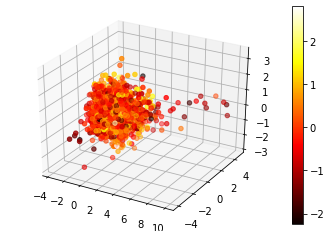

<Figure size 3600x3600 with 0 Axes>

In [102]:
fig = plt.figure()
plt.figure(figsize=(50,50))
ax = fig.add_subplot(111, projection='3d')

x = reduced[:,0]
y = reduced[:,1]
z = reduced[:,2]
c = reduced[:,3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

## 1.11 Applying random forest regression on Scores feature set

hyper parameter tuning

In [103]:
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1)
grid.fit(x_tr_1, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [104]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 30}

In [74]:
rf = RandomForestRegressor(n_estimators=30,min_samples_split=8,max_features='log2',bootstrap=True,criterion='mae')
rf.fit(x_tr_1,y_train)
rf.score(x_tr_1,y_train)

0.7434388149760832

## 1.12 storing pickle into a file

In [108]:
from sklearn.externals import joblib
joblib.dump(rf, 'rf.pkl')

['rf.pkl']